## Problem Statement
In the airline industry, maximizing profitability is a complex challenge influenced by multiple operational and financial factors. Given historical flight performance data, your task is to develop a machine learning model that accurately predicts profit (USD) for each flight based on features such as:

- **Flight delays**
- **Aircraft utilization**
- **Turnaround time**
- **Load factor**
- **Fleet availability**
- **Maintenance downtime**
- **Fuel efficiency**
- **Revenue**
- **Operating costs**

### Your model must be robust enough to handle real-world uncertainties, including:

- **Seasonal fluctuations**
- **Operational inefficiencies**
- **Cost variations**


All while maintaining high predictive accuracy. Additionally, the model should provide **explainability** to help airline operators understand the key drivers of profitability and optimize decision-making.

The final model will be evaluated based on:

- **Prediction accuracy**
- **Interpretability**
- **Generalization to unseen data**


## **Objective**

Develop a **high-performance ML model** to predict airline profitability and provide actionable insights for operational optimization.

In [65]:
!pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Orginal Data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/Bhawesh-Agrawal/NEURAL-NINJAS/refs/heads/main/Aviation_KPIs_Dataset.xlsx%20-%20Sheet1.csv")

In [68]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [70]:
df.describe()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
std,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784
min,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000


In [71]:
df.columns

Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

In [72]:
corr = df.drop(columns=['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time'],axis=0).corr()


<Axes: >

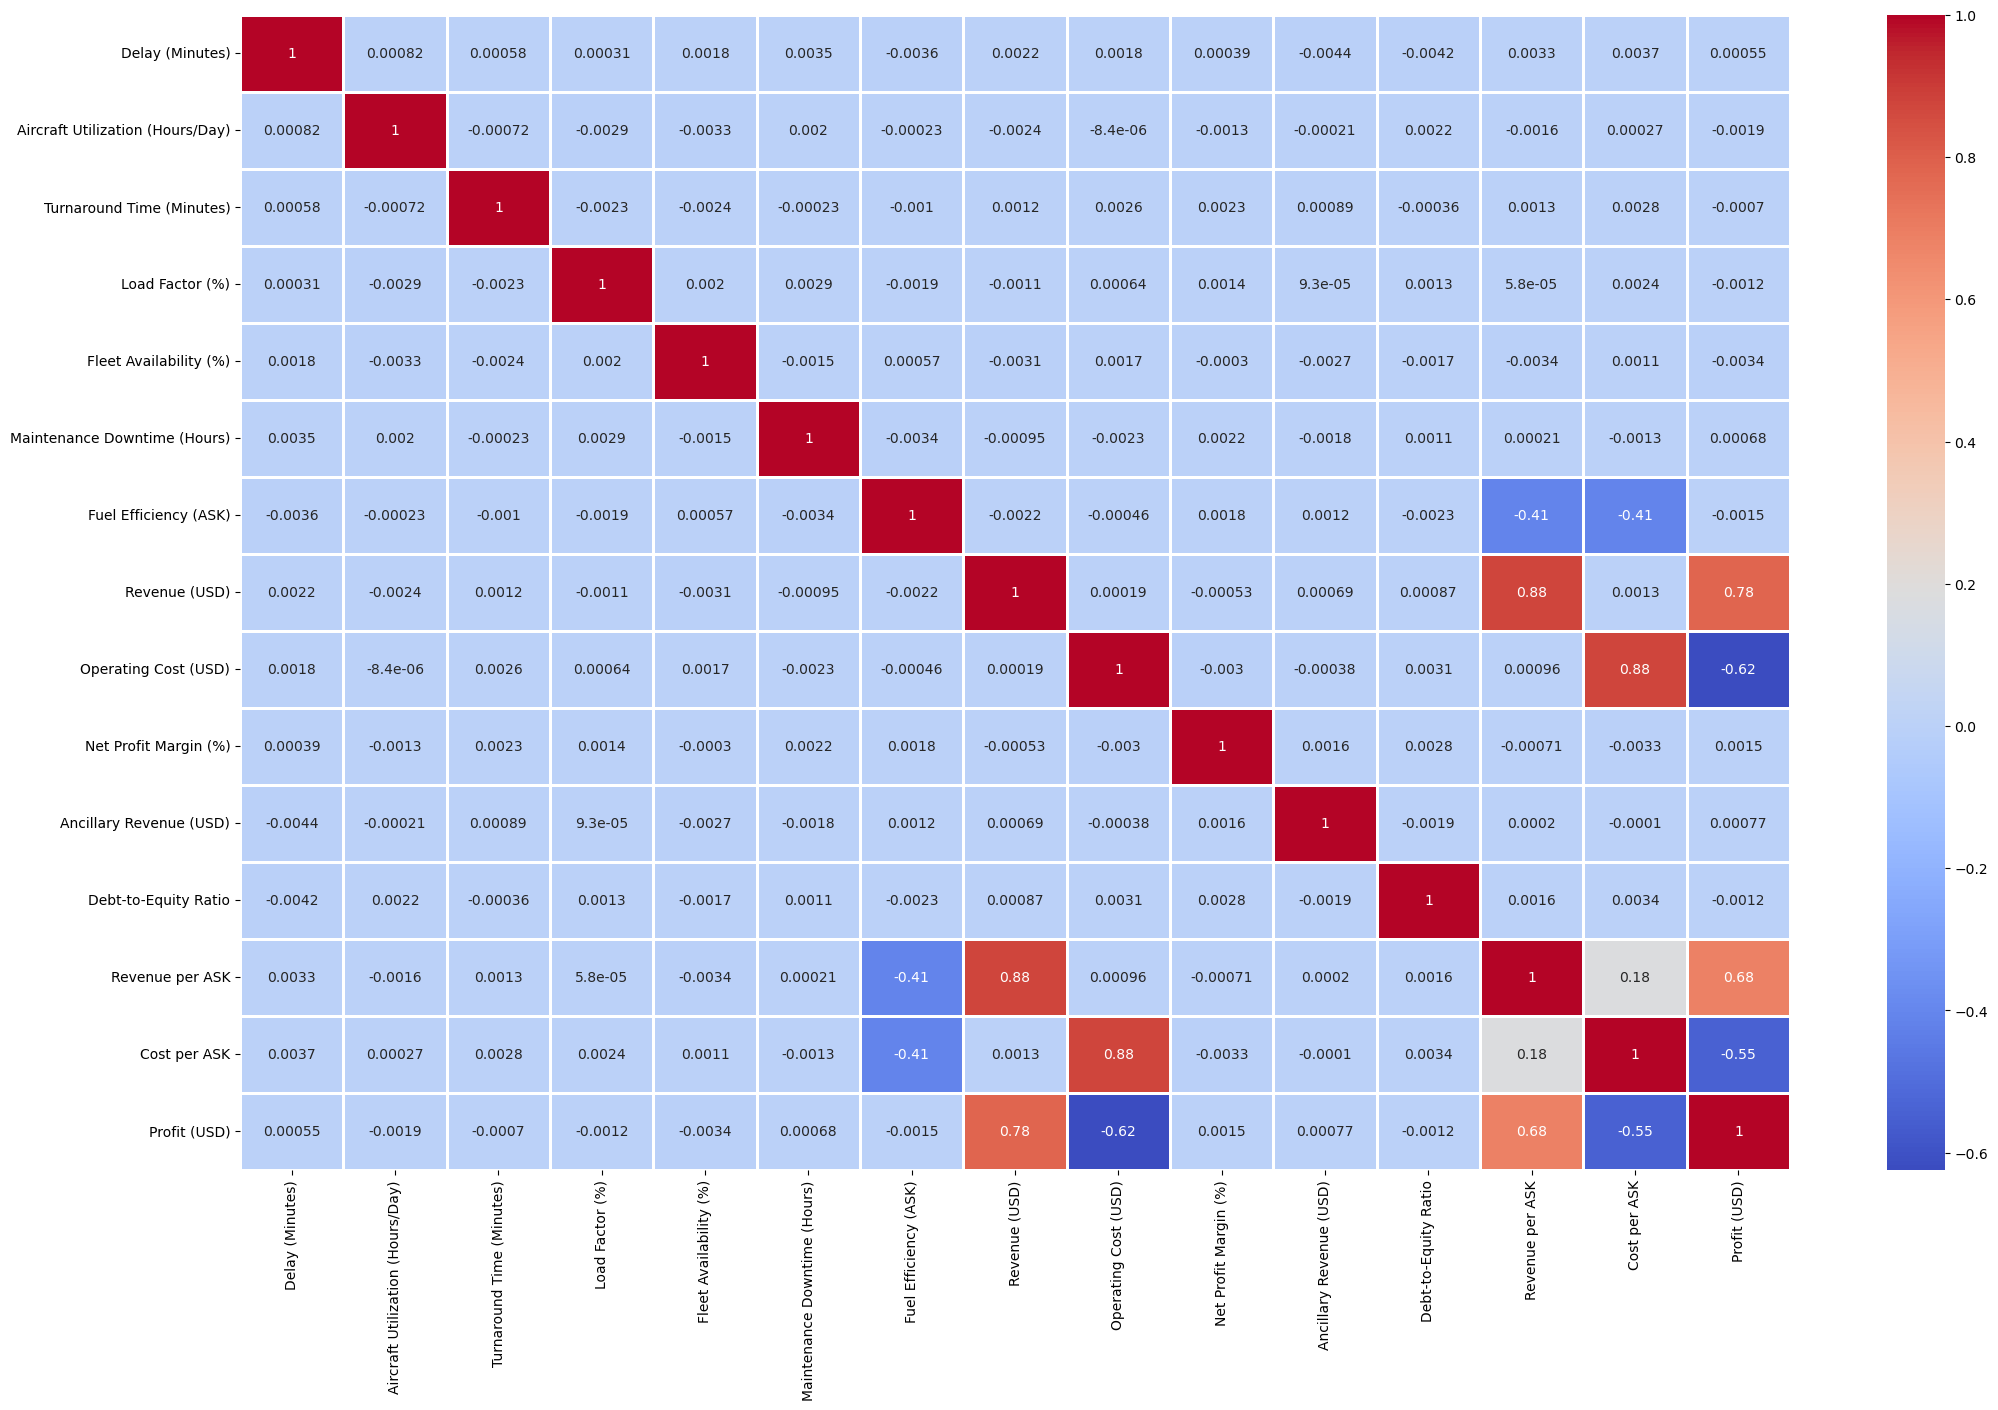

In [73]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr,cmap = 'coolwarm',annot = True,linewidths=1, linecolor='white')

In [74]:
df.head(2)

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.9,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.7,2941.32,2.89,8040.01,398.07,30032.84


# Data for Modelling

### Feature Engineering for modeling

In [143]:
#Copying the data
dm = df.copy()

In [144]:
# Convert the Scheduled and Actual Departure Time columns to datetime
dm['Scheduled Departure Time'] = pd.to_datetime(dm['Scheduled Departure Time'])
dm['Actual Departure Time'] = pd.to_datetime(dm['Scheduled Departure Time'])
# Extract month, year, and weekday from the 'Scheduled Departure Time' and 'Actual Departure Time'
dm['Scheduled_Month'] = dm['Scheduled Departure Time'].dt.month
dm['Scheduled_Year'] = dm['Scheduled Departure Time'].dt.year
dm['Scheduled_Weekday'] = dm['Scheduled Departure Time'].dt.weekday + 1  


dm['Actual_Departure_Time_Int'] = dm['Actual Departure Time'].dt.hour * 100 + dm['Actual Departure Time'].dt.minute



In [145]:
# Reaarranging the columns
dm =dm[['Scheduled_Month', 'Scheduled_Year',
       'Scheduled_Weekday','Actual_Departure_Time_Int','Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)']]

In [146]:
dm.head(2)

,Scheduled_Month,Scheduled_Year,Scheduled_Weekday,Actual_Departure_Time_Int,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,5,2024,1,1151,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.9,1058.68,2.46,2639.46,6710.26,-16893.84
1,1,2024,2,656,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.7,2941.32,2.89,8040.01,398.07,30032.84


In [147]:
dm.describe()

,Scheduled_Month,Scheduled_Year,Scheduled_Weekday,Actual_Departure_Time_Int,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000.000000,200000.0,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,6.431445,2024.0,3.980915,1177.206845,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
std,3.412039,0.0,2.000190,693.444900,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784
min,1.000000,2024.0,1.000000,0.000000,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,3.000000,2024.0,2.000000,557.000000,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,6.000000,2024.0,4.000000,1157.000000,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,9.000000,2024.0,6.000000,1800.000000,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,12.000000,2024.0,7.000000,2359.000000,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000


### Checking Outliers

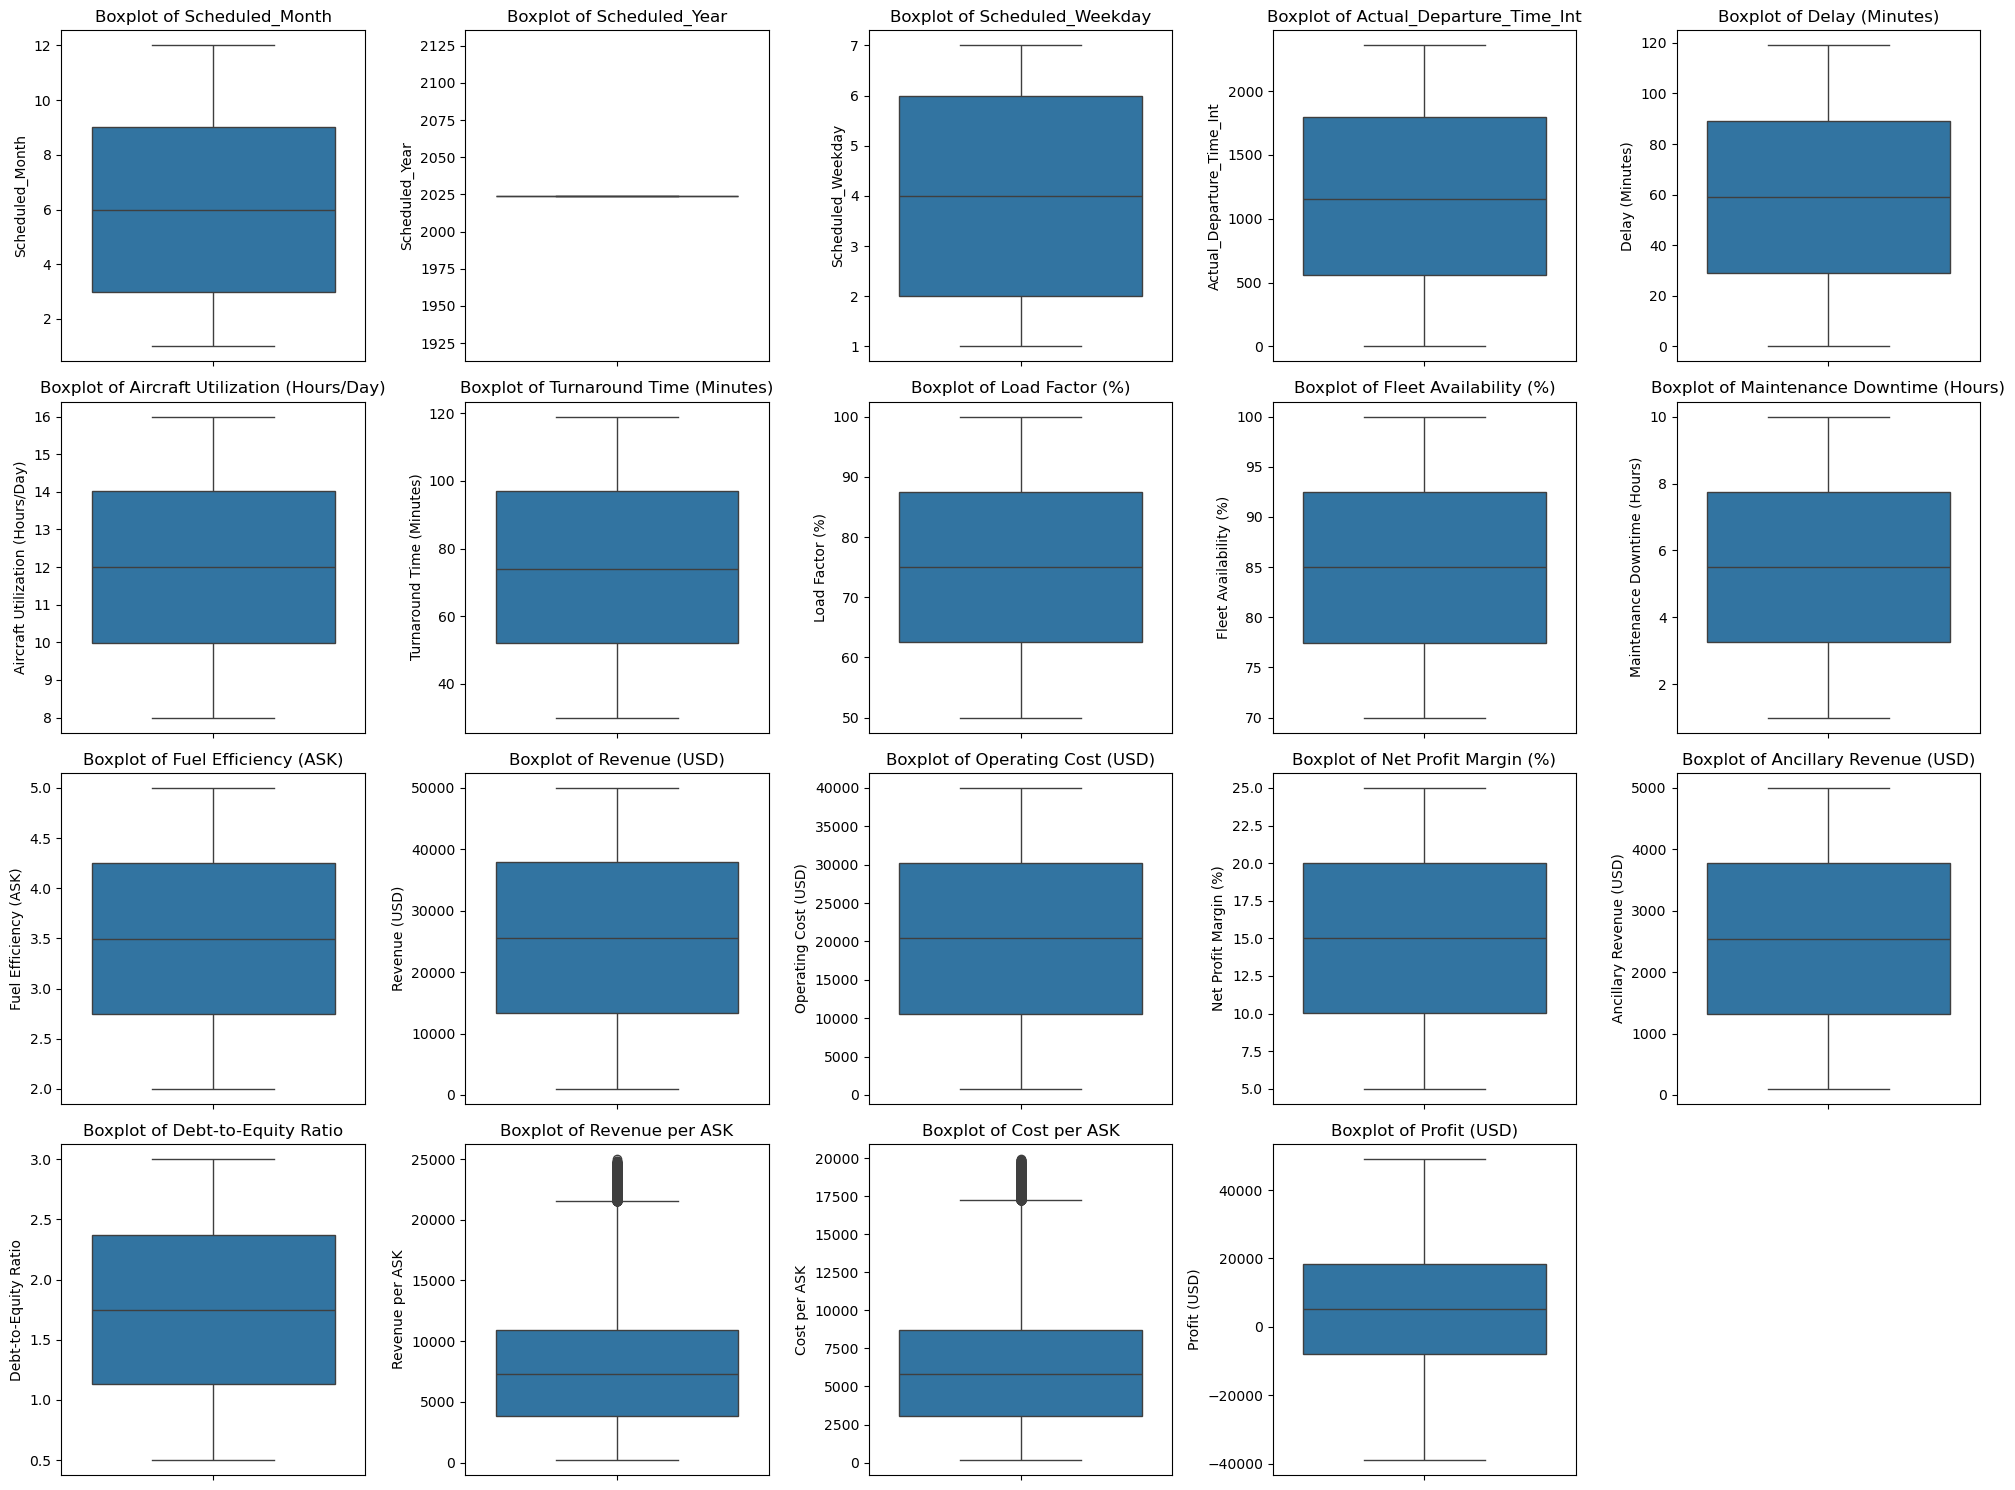

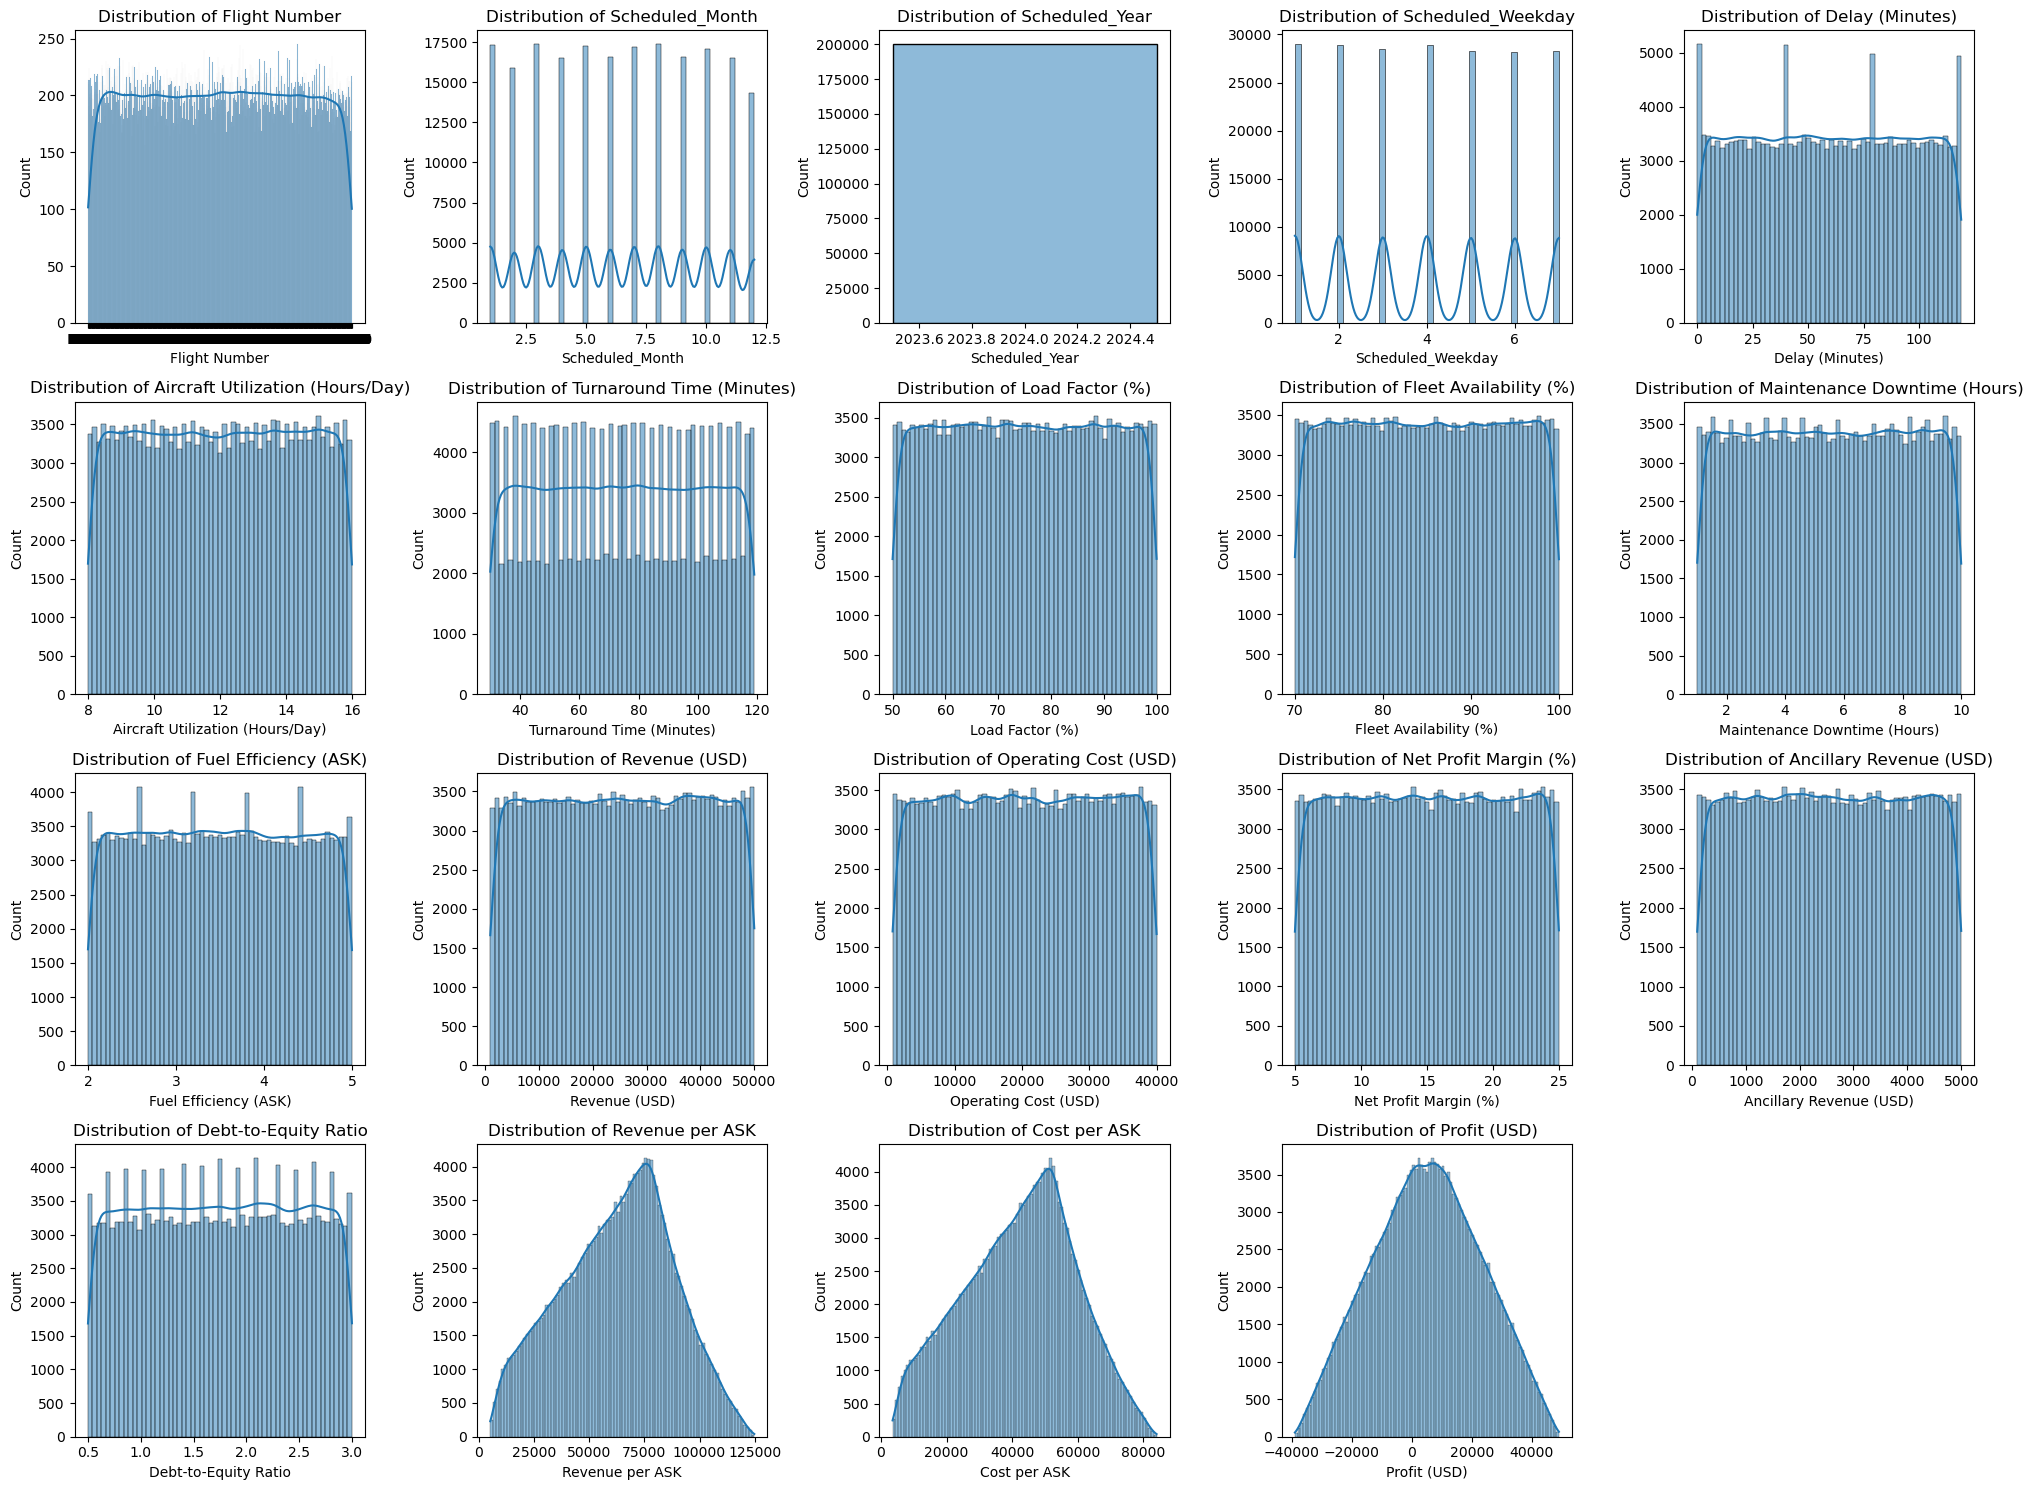

In [149]:

# Plotting distribution for each column to detect outliers
plt.figure(figsize=(20, 15))

# Plotting for each feature in the data
for i, column in enumerate(dm.columns):
    plt.subplot(4, 5, i+1)  # Adjust the number of rows and columns as needed
    sns.boxplot(dm[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Plotting histograms to check distributions of each column
plt.figure(figsize=(20, 15))

# Plotting histograms for each feature in the data
for i, column in enumerate(data.columns):
    plt.subplot(4, 5, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### Treating Outliers

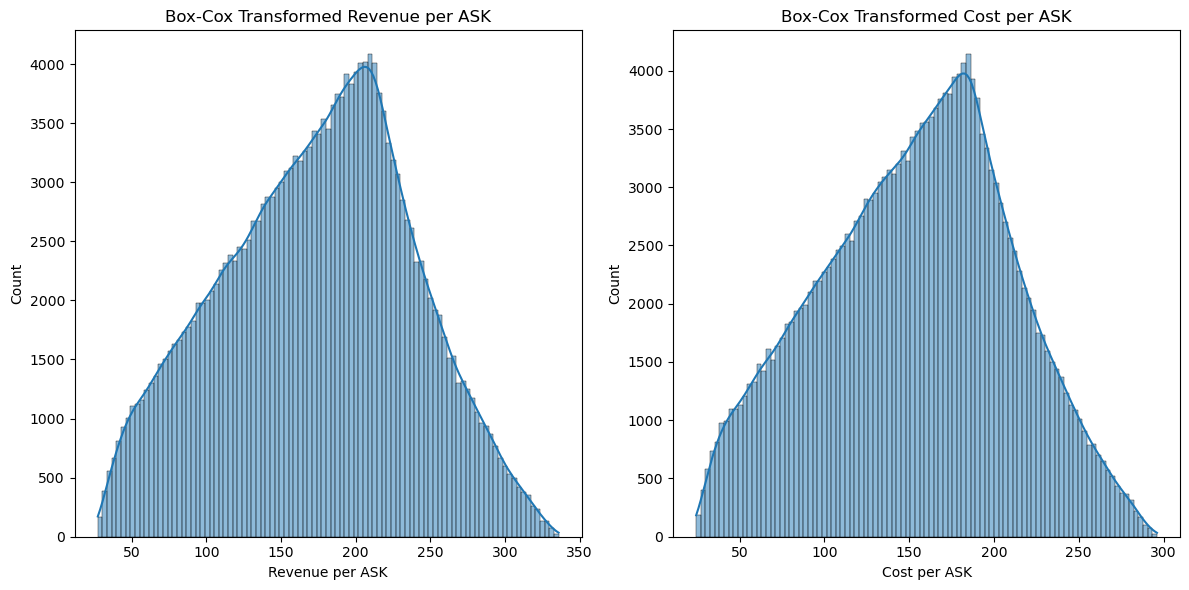

In [150]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (only for positive values)
dm['Revenue per ASK'], _ = boxcox(dm['Revenue per ASK'] + 1)  # Adding 1 to ensure positivity
dm['Cost per ASK'], _ = boxcox(dm['Cost per ASK'] + 1)  # Adding 1 to ensure positivity

# Plot the transformed distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dm['Revenue per ASK'], kde=True)
plt.title('Box-Cox Transformed Revenue per ASK')

plt.subplot(1, 2, 2)
sns.histplot(dm['Cost per ASK'], kde=True)
plt.title('Box-Cox Transformed Cost per ASK')

plt.tight_layout()
plt.show()


### Final columns in dm

In [114]:
dm.columns

Index(['Scheduled_Month', 'Scheduled_Year', 'Scheduled_Weekday',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

### Splitting the data into X,y(target)

In [108]:
X = dm.drop(columns =['Profit (USD)'],axis=1)
y=dm['Profit (USD)']

### Checking feature importance

In [111]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y)

# Create a DataFrame to display the results
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display the feature importance based on mutual information
print(mutual_info_df)

                             Feature  Mutual Information
10                     Revenue (USD)            0.622163
15                   Revenue per ASK            0.407327
11              Operating Cost (USD)            0.402355
16                      Cost per ASK            0.257435
5          Turnaround Time (Minutes)            0.003599
13           Ancillary Revenue (USD)            0.002690
7             Fleet Availability (%)            0.001229
14              Debt-to-Equity Ratio            0.000805
2                  Scheduled_Weekday            0.000421
12             Net Profit Margin (%)            0.000315
0                    Scheduled_Month            0.000000
9              Fuel Efficiency (ASK)            0.000000
1                     Scheduled_Year            0.000000
6                    Load Factor (%)            0.000000
4   Aircraft Utilization (Hours/Day)            0.000000
3                    Delay (Minutes)            0.000000
8       Maintenance Downtime (H

In [157]:
dm.head()

,Scheduled_Month,Scheduled_Year,Scheduled_Weekday,Actual_Departure_Time_Int,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,5,2024,1,1151,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,105.834916,169.723270,-16893.84
1,1,2024,2,656,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,187.863466,39.092520,30032.84
2,5,2024,4,918,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,117.214887,175.441978,-16794.61
3,8,2024,4,521,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,206.464584,117.031212,26468.92
4,7,2024,4,1529,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,99.002615,173.131701,-23137.50


# Data For Presentation

## Feature Engineering

In [ ]:
data = df.copy()

In [ ]:
import pandas as pd

# Convert the Scheduled and Actual Departure Time columns to datetime
data['Scheduled Departure Time'] = pd.to_datetime(data['Scheduled Departure Time'])
data['Actual Departure Time'] = pd.to_datetime(data['Actual Departure Time'])

# Extract month, year, and weekday from the 'Scheduled Departure Time' and 'Actual Departure Time'
data['Scheduled_Month'] = data['Scheduled Departure Time'].dt.month
data['Scheduled_Year'] = data['Scheduled Departure Time'].dt.year
data['Scheduled_Weekday'] = data['Scheduled Departure Time'].dt.weekday + 1  # Weekday as number (1 = Monday, 7 = Sunday)


In [ ]:
data.head(2)

In [ ]:
data= data[['Flight Number','Scheduled_Month', 'Scheduled_Year',
       'Scheduled_Weekday',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)', ]]

## EDA

In [ ]:
def analysing_

In [ ]:
# Grouping data by Scheduled_Month, Scheduled_Year, and Scheduled_Weekday to analyze the profit
monthly_profit = data.groupby('Scheduled_Month')['Profit (USD)'].sum()
weekly_profit = data.groupby('Scheduled_Weekday')['Profit (USD)'].sum()
yearly_profit = data.groupby('Scheduled_Year')['Profit (USD)'].sum()

# Plotting the charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Monthly profit chart
axes[0].bar(monthly_profit.index, monthly_profit.values)
axes[0].set_title('Profit by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Profit (USD)')

# Weekly profit chart
axes[1].bar(weekly_profit.index, weekly_profit.values)
axes[1].set_title('Profit by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Profit (USD)')

# Yearly profit chart
axes[2].bar(yearly_profit.index, yearly_profit.values)
axes[2].set_title('Profit by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Profit (USD)')

plt.tight_layout()
plt.show()
